In [ ]:
#random forest model: 

In [ ]:
#In this assignment students will build the random forest model after
#normalizing the variable to house pricing from boston data set.
#Following the code to get data into the environment:


In [3]:
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
#from sklearn import datasets
#boston = datasets.load_boston()
#features = pd.DataFrame(boston.data,columns=boston.feature_names)
#targets = boston.target

In [24]:
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score 
from sklearn.datasets import load_boston 
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV 
#import warnings warnings.filterwarnings('ignore')

In [25]:
boston = load_boston()
print("Keys:", boston.keys())
print("Shape:", boston.data.shape)
print("Columns", boston.feature_names)

Keys: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
Shape: (506, 13)
Columns ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [26]:
bos = pd.DataFrame(boston.data, columns=boston.feature_names)
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:
minimum_price = np.min(boston.target)

In [28]:
maximum_price = np.max(boston.target)

In [29]:
mean_price = np.mean(boston.target)

In [30]:
median_price = np.median(boston.target)

In [31]:
std_price = np.std(boston.target)

In [32]:
print("Statistics for Boston housing dataset:\n")
print( "Minimum price: ${:,.2f}".format(minimum_price * 1000)) 
print( "Maximum price: ${:,.2f}".format(maximum_price * 1000)) 
print( "Mean price: ${:,.2f}".format(mean_price * 1000)) 
print( "Median price ${:,.2f}".format(median_price * 1000)) 


Statistics for Boston housing dataset:

Minimum price: $5,000.00
Maximum price: $50,000.00
Mean price: $22,532.81
Median price $21,200.00


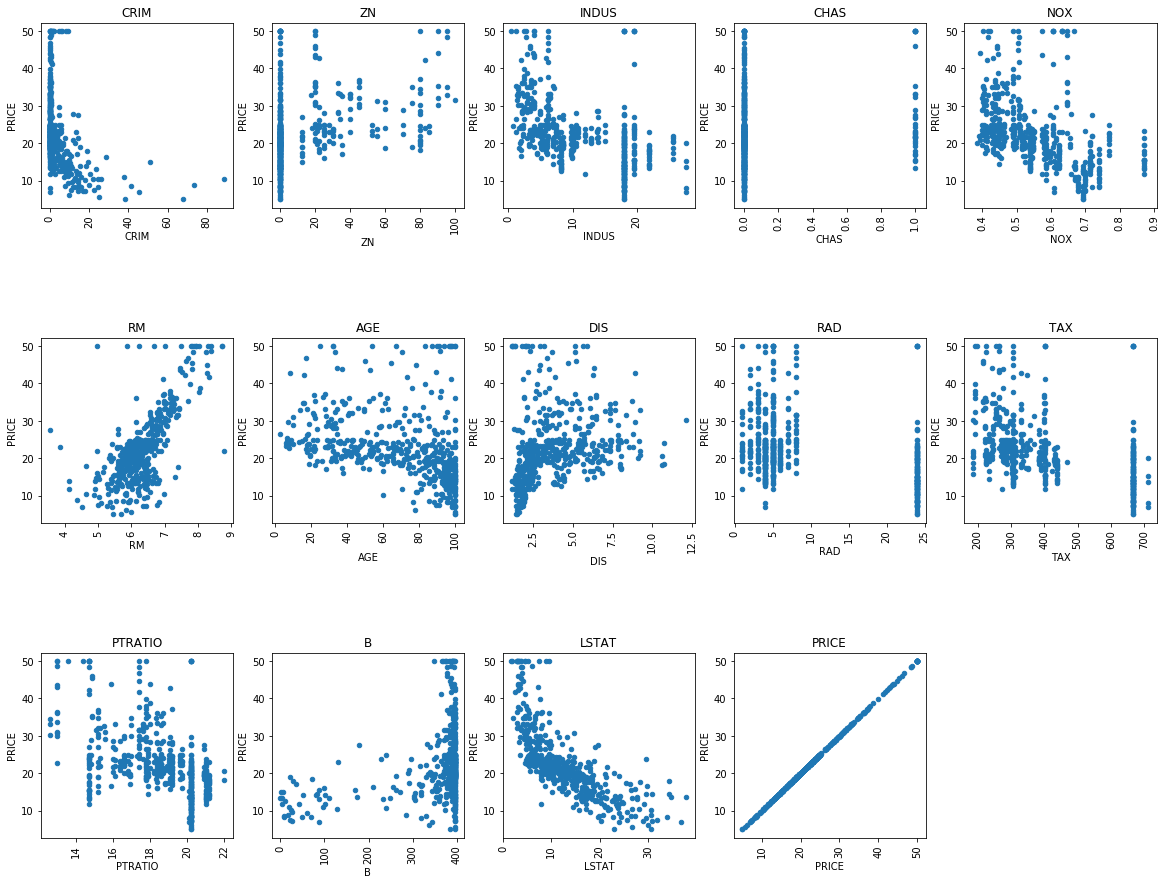

In [33]:
fig = plt.figure(figsize=(20,15))
cols = 5 
rows = math.ceil(float(bos.shape[1]) / cols)
for i, column in enumerate(bos.columns): 
    axs = fig.add_subplot(rows, cols, i + 1) 
    axs.set_title(column) 
    bos.plot(kind='scatter', x=column, y='PRICE', ax=axs)
    #bos.plot(kind='bar', x=column, y='PRICE', ax=axs)
    plt.xticks(rotation="vertical") 
    plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [34]:
y_column = bos['PRICE']

In [35]:
x_columns = bos.drop('PRICE', axis=1)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x_columns, y_column, test_size = 0.3, random_state = 25)

In [37]:
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train) 
X_test = X_scaler.transform(X_test)

In [38]:
y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train[:, None])[:, 0] 
y_test = y_scaler.transform(y_test[:, None])[:, 0]

C:\Users\OM\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
C:\Users\OM\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
model = RandomForestRegressor()
model.fit(X_train, y_train) 
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None, oob_score=False, random_state=None, verbose=0, warm_start=False) 
y_pred = model.predict(X_test)
print("Test Accuracy:", format(metrics.r2_score(y_test, y_pred) * 100, '.2f'), '%')
print("Mean Squared Error:", format(metrics.mean_squared_error(y_test, y_pred), '.5f')) 


C:\Users\OM\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Test Accuracy: 81.96 %
Mean Squared Error: 0.15395


In [40]:
parameters = {"min_samples_split": [2, 5, 10], "max_depth": [None, 2, 5, 10], "min_samples_leaf": [1, 3, 5], "max_features": ['auto', 'sqrt', 'log2'], "n_estimators": [50, 75, 100] }

In [41]:
grid_search = GridSearchCV(RandomForestRegressor(), param_grid=parameters, n_jobs=-1, verbose=1) 
grid_search.fit(X_train, y_train)

C:\Users\OM\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 972 out of 972 | elapsed:  1.6min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_split': [2, 5, 10], 'max_depth': [None, 2, 5, 10], 'min_samples_leaf': [1, 3, 5], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [50, 75, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [42]:
print("Best parameters set found on development set:\n") 
print(grid_search.best_params_)

Best parameters set found on development set:

{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [43]:
Fitting 3 folds for each of 324 candidates, 
totalling 972 fits [Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers. [Parallel(n_jobs=-1)]: Done 52 tasks | elapsed: 1.0s [Parallel(n_jobs=-1)]: Done 352 tasks | elapsed: 4.6s [Parallel(n_jobs=-1)]: Done 852 tasks | elapsed: 12.1s Best parameters set found on development set:

SyntaxError: invalid syntax (<ipython-input-43-83fad4c2cdd4>, line 1)

In [ ]:
print("Accuracy for test data set:\n") 
y_pred = grid_search.predict(X_test) 
print("Test Accuracy:", format(metrics.r2_score(y_test, y_pred) * 100, '.2f'), '%') 
print("Mean Squared Error:", format(metrics.mean_squared_error(y_test, y_pred), '.5f'))

In [ ]:
print("It improved the Accuracy by 5% after tuning the hyper parameters and mean squared error is reduced from 0.16 to 0.11.") 